In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Consider a roulette game that has two possible winning spots: 1 and 2. Choosing 1 or 2 you have a 50% chance of winning the game. If I'm trying to figure out _how_ many times it will take for 1 or 2 to win, naively I might think one spin with 50% chance of winning + one spin at 50% chance of winning means I should win once every two spins. 

We can't add up random events this way though. In reality, with 2 spins we have a few different outcomes, 

|outcomes 1 first|outcome 2 first|
|---|---|
|11|21|
|12|22|

Two out of four of these outcomes are what I originally expected, that 1 and 2 will win once, but the other two outcomes are that either 1 never wins or 2 never wins. So there is a 50% chance either 1 or 2 will not win. We can summarize this result by averaging the probabilities that a number _does not appear_, 

$\frac{\frac{1}{2}[11] + \frac{0}{2}[21] + \frac{0}{2}[12] + \frac{1}{2}[22]}{4~games} = 25\%$

What happens when we increase the number of outcomes in this game and the number of spins we get to play? For example, if we can choose between 1 and 4 and we get 4 spins, or choose between 1 and 100 and get 100 spins. Will the percent of numbers that do not appear in a game continue to increase or decrease?



In [91]:
from numpy.random import default_rng


In [92]:
rng = default_rng(42)

# rng.

In [93]:
N = 2
fraction = np.zeros(10000)
for i in range(10000):
    results = rng.integers(1, N+1, size = N)
    my1_e = 1- len(np.unique(results))/N
    fraction[i] = my1_e
np.mean(fraction)

0.2539

In [94]:
np.exp(1)

2.718281828459045

## Dropping keys and checking randomly

[@UpandAtom](youtube_hyperlink) has a short video that details a counterintuitive probability problem. 

Consider a person that goes to open their door with a key, but can't remember which one opens the door. They select one of the $N$ keys on the keyring and then try to open the door. On this first try, the chance that they open the door is 1/N. 

If they drop their keys and randomly select another key, what is the probablity that they pick the right key in this scenario? Naively, I would say the chance is _still_ $1/N$. This naive prediction _does not_ take into account the information we know that the keys have been dropped once already. Factoring in this information to my prediction, it changes the probability that the correct key will be selected, its actually

$P(key~is~correct) = \frac{1}{N}\cdot\frac{1-N}{N}$

The probability that they select the correct key on the second try is probablity that they select the key correctly on this second try multiplied by the probability that they selected the key _incorrectly_ on the first try. 

This seems wrong, how can the probabilty change in this seemingly random selection of keys?

Let's try a Monte Carlo experiment with $\times 2$ keys, 

We'll build 1000 virtual people that all try to get into their houses. Each person is given 2 keys, we'll label them `0` and `1`. If they select key `0`, they get in. If they select key `1`, they drop the keys and select a new one.


_Note: because these are virtual people we can be a little mean and leave the keys indistinguishable, so its always a random choice of `0` or `1`._

According to our theory above, 

|number of tries|number of people|percent success|
|---|---|---|
|1| 500 | 50\%|
|2| 250 | 25\%|
|3| 125| 12.5\%|
|4| 62.5|0.0625\%|

Our random group of 1000 virtual people locked out of the apartment will have 500 people that guess correctly on the first try and only 62-63 people that guess correctly on the 4th try. 

(array([  0., 496., 250., 122.,  60.,  36.,  18.,  12.,   2.,   3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

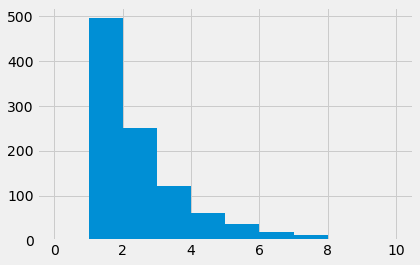

In [107]:
N = 1000
cases = np.zeros(N)
keys = np.arange(2)
for ncase in range(N):
    tries = 0
    key = 10
    while key != 0:
        key = rng.integers(len(keys), size = 1)
        tries += 1
    cases[ncase] = tries
plt.hist(cases, bins = np.arange(np.max(cases)))

In [113]:
try_01 = np.sum(cases == 1)/N
try_02 = np.sum(cases == 2)/N
try_03 = np.sum(cases == 3)/N
try_04 = np.sum(cases == 4)/N

print('success on try 1: {}, {:1.2f}%'.format(try_01*N, 100*try_01))

print('success on try 2: {}, {:1.2f}%'.format(try_02*N, 100*try_02))

print('success on try 3: {}, {:1.2f}%'.format(try_03*N, 100*try_03))

print('success on try 4: {}, {:1.2f}%'.format(try_04*N, 100*try_04))


success on try 1: 496.0, 49.60%
success on try 2: 250.0, 25.00%
success on try 3: 122.0, 12.20%
success on try 4: 60.0, 6.00%


Using a Monte Carlo approach, we built a discrete version of the dropping keys scenario. The results from Monte Carlo support the approach of using the probabilites of guessing correctly **and** the probabilities of previouse _incorrect_ guesses to find that $\approx60~out~of~1000$ people will guess correctly on their 4th try. 

## Exercise: failure prediction

In the dropping keys experiment, we ended the trials when the virtual person _succeeded_ in entering the room. What would this look like if an engineering process _failed_ when a certain device is used?

Consider a manufacturing plant that produces nuts and bolts. They are the cheapest bolts than can be manufactured. The biggest cost savings is due to their removal of quality control efforts on bolts. 

Your company needs to use 10 bolts in every device you manufacture. If one bolt fails, the whole device fails. You're quality control team knows the bolts fail 1-out-of-10 times. When you test a device, if it fails the bolts are discarded and ten more used to assemble the device. 

Your manager is trying to understand why it seems like so many devices fail the first time they are tested. Explain the current failure rate to your manager with a Monte Carlo analysis using 10 bolts and 10% failure rate. 



(array([0.000e+00, 1.011e+03, 8.970e+02, 8.170e+02, 7.510e+02, 6.490e+02,
        5.910e+02, 5.240e+02, 4.840e+02, 4.200e+02, 3.760e+02, 3.240e+02,
        2.970e+02, 2.920e+02, 2.330e+02, 2.420e+02, 2.080e+02, 1.830e+02,
        1.710e+02, 1.470e+02, 1.400e+02, 1.190e+02, 1.210e+02, 9.700e+01,
        9.700e+01, 9.300e+01, 6.500e+01, 5.500e+01, 5.400e+01, 5.900e+01,
        4.400e+01, 4.700e+01, 4.600e+01, 3.500e+01, 2.700e+01, 3.100e+01,
        2.700e+01, 2.000e+01, 2.300e+01, 2.000e+01, 2.000e+01, 1.700e+01,
        1.400e+01, 1.400e+01, 7.000e+00, 9.000e+00, 1.400e+01, 3.000e+00,
        9.000e+00, 7.000e+00, 8.000e+00, 3.000e+00, 4.000e+00, 4.000e+00,
        3.000e+00, 6.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

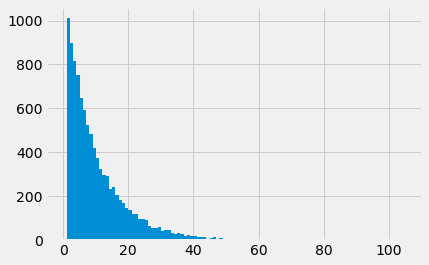

In [120]:
N = 10000
cases = np.zeros(N)
keys = np.arange(10)
for ncase in range(N):
    tries = 0
    key = 10
    while key != 0:
        key = rng.integers(len(keys), size = 1)
        tries += 1
    cases[ncase] = tries
plt.hist(cases, bins = np.arange(np.max(cases)))

In [125]:
try_01 = np.sum(cases == 1)/N
try_02 = np.sum(cases == 2)/N
try_03 = np.sum(cases == 3)/N
try_04 = np.sum(cases == 4)/N

print('failure on try 1: {}, {:1.2f}%'.format(try_01*N, 100*try_01))

print('failure on try 2: {}, {:1.2f}%'.format(try_02*N, 100*try_02))

print('failure on try 3: {}, {:1.2f}%'.format(try_03*N, 100*try_03))

print('failure on try 4: {}, {:1.2f}%'.format(try_04*N, 100*try_04))


failure on try 1: 1011.0, 10.11%
failure on try 2: 897.0, 8.97%
failure on try 3: 817.0, 8.17%
failure on try 4: 751.0, 7.51%
